# Ağ Anomalisi Tespiti 1. Hafta

* Trello üzerinden planlama yapıldı.
* Projenin github reposu oluşturulup veri seti bu repoya yüklendi.
* Ortak çalışma alanı olan Colab platformu oluşturuldu.
* Colab üzerinden veri setinin train kısmı (%80) üzerinden veri analizi yapıldı.
* Veri Setindeki boş değerler gözlemlendi.
* Bütün sütunlarda 1 boş değer olduğu görüldü, aynı satırdaki verinin bu durumu sağlamış olduğu düşünülerek hareket edildi,  bu satır bulunup veri setinden çıkarıldı.
* Veri Setindeki sütunlar incelendi.
* Servislerin sayısını pasta grafiği şeklinde gösterildi.


# Hesaplarımız :
###Github -> https://github.com/meryemarpaci/YZVM-Machine-Learning-Project
###Trello -> https://trello.com/b/q8WCnXK9/yzvm-ml-project

# Veri Setine Genel Bakış

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv("/content/TrainData.csv")

In [ ]:
df.shape

(25193, 42)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


## Bazı Sütunların Özellikleri:

* Duration:  Bağlantı süresinin uzunluğu
* Protocol_type: Bağlantıda kullanılan protokol
* Service: Kullanılan hedef ağ hizmeti
* Flag: Bağlantı durumu - Normal veya Hata
* Src_bytes: Tek bağlantıda kaynaktan hedefe aktarılan veri baytlarının sayısı
* Dst_bytes: Tek bağlantıda hedeften kaynağa aktarılan veri baytlarının sayısı
* Land: kaynak ve hedef IP adresleri ve port numaraları eşitse, bu değişken 1 değerini alır, aksi takdirde 0
* Wrong_fragment: Bu bağlantıdaki toplam yanlış parça sayısı
* Urgent: Bu bağlantıdaki acil paketlerin sayısı. Acil paketler, acil biti etkinleştirilmiş paketlerdir


##Null Değerlerin Kontrolü

In [ ]:
df.isnull().sum()

duration                       1
protocol_type                  1
service                        1
flag                           1
src_bytes                      1
dst_bytes                      1
land                           1
wrong_fragment                 1
urgent                         1
hot                            1
num_failed_logins              1
logged_in                      1
num_compromised                1
root_shell                     1
su_attempted                   1
num_root                       1
num_file_creations             1
num_shells                     1
num_access_files               1
num_outbound_cmds              1
is_host_login                  1
is_guest_login                 1
count                          1
srv_count                      1
serror_rate                    1
srv_serror_rate                1
rerror_rate                    1
srv_rerror_rate                1
same_srv_rate                  1
diff_srv_rate                  1
srv_diff_h

In [ ]:
null_satir = df[df.isnull().any(axis=1)]
null_satir

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


167. satırdaki bütün sütunların boş değerlere sahip olduğu görüldü.

In [ ]:
df_new = df.drop(null_satir.index)

In [ ]:
df_new.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

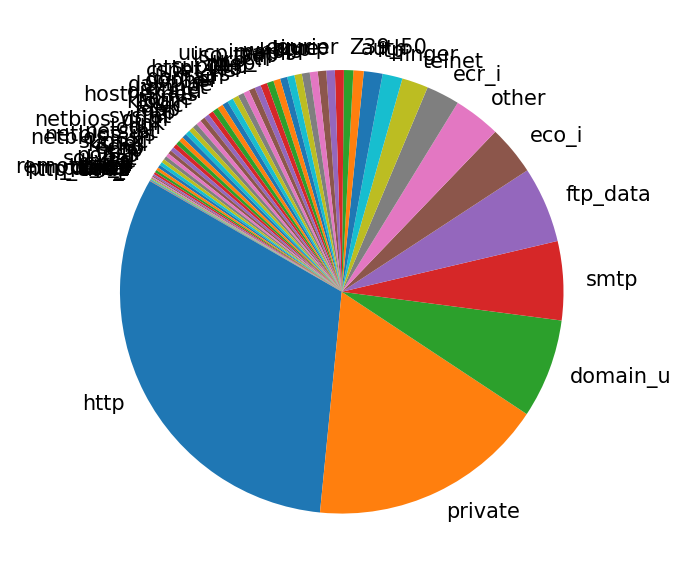

In [52]:
import matplotlib.pyplot as plt
service_counts = df['service'].value_counts()
plt.figure(dpi=150)
plt.pie(service_counts, labels=service_counts.index,startangle=150);